# Explore Clusters Dataset

In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append("..")
from helpers import filename_for
from plotconf import *

Welcome to JupyROOT 6.16/00


In [2]:
pdfile = filename_for(
    distance=15, doubleplane=30, energy=600, erel=500, neutron=4, physics="inclxx", subrun=0, what="clusterfeature.pkl"
)
data = pd.read_pickle(pdfile)
display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z
0,0.0,0.0,69.226189,0.407042,1.0,465.095703,2.273741e-13,0.000000,0.407042,-7.500000,-3.180923,1547.5
1,0.0,0.0,67.524712,3.345579,1.0,546.665833,2.275124e-13,0.000000,3.345579,-17.458979,-42.500000,1572.5
2,0.0,0.0,72.508102,22.580217,1.0,467.675446,2.273737e-13,0.000000,22.580217,38.562222,-32.500000,1622.5
3,0.0,0.0,79.351295,10.526660,1.0,347.039032,0.000000e+00,0.000000,10.526660,92.500000,-24.113075,1627.5
4,0.0,0.0,72.019783,1.609079,1.0,511.417053,7.105427e-15,0.000000,1.609079,-77.500000,-56.853230,1647.5
...,...,...,...,...,...,...,...,...,...,...,...,...
206654,9999.0,0.0,76.512268,6.524112,1.0,528.519287,0.000000e+00,0.000000,6.524112,27.500000,17.024023,1767.5
206655,9999.0,1.0,63.703350,262.812866,8.0,592.306274,1.180426e+01,1.325573,121.316444,14.450871,22.500000,1512.5
206656,9999.0,1.0,64.100761,109.085899,5.0,592.898193,5.014707e+00,1.231060,44.988491,-4.890872,7.500000,1522.5
206657,9999.0,1.0,69.244034,408.277039,17.0,597.293884,2.257217e+01,3.386822,56.003304,-2.500000,-1.972938,1647.5


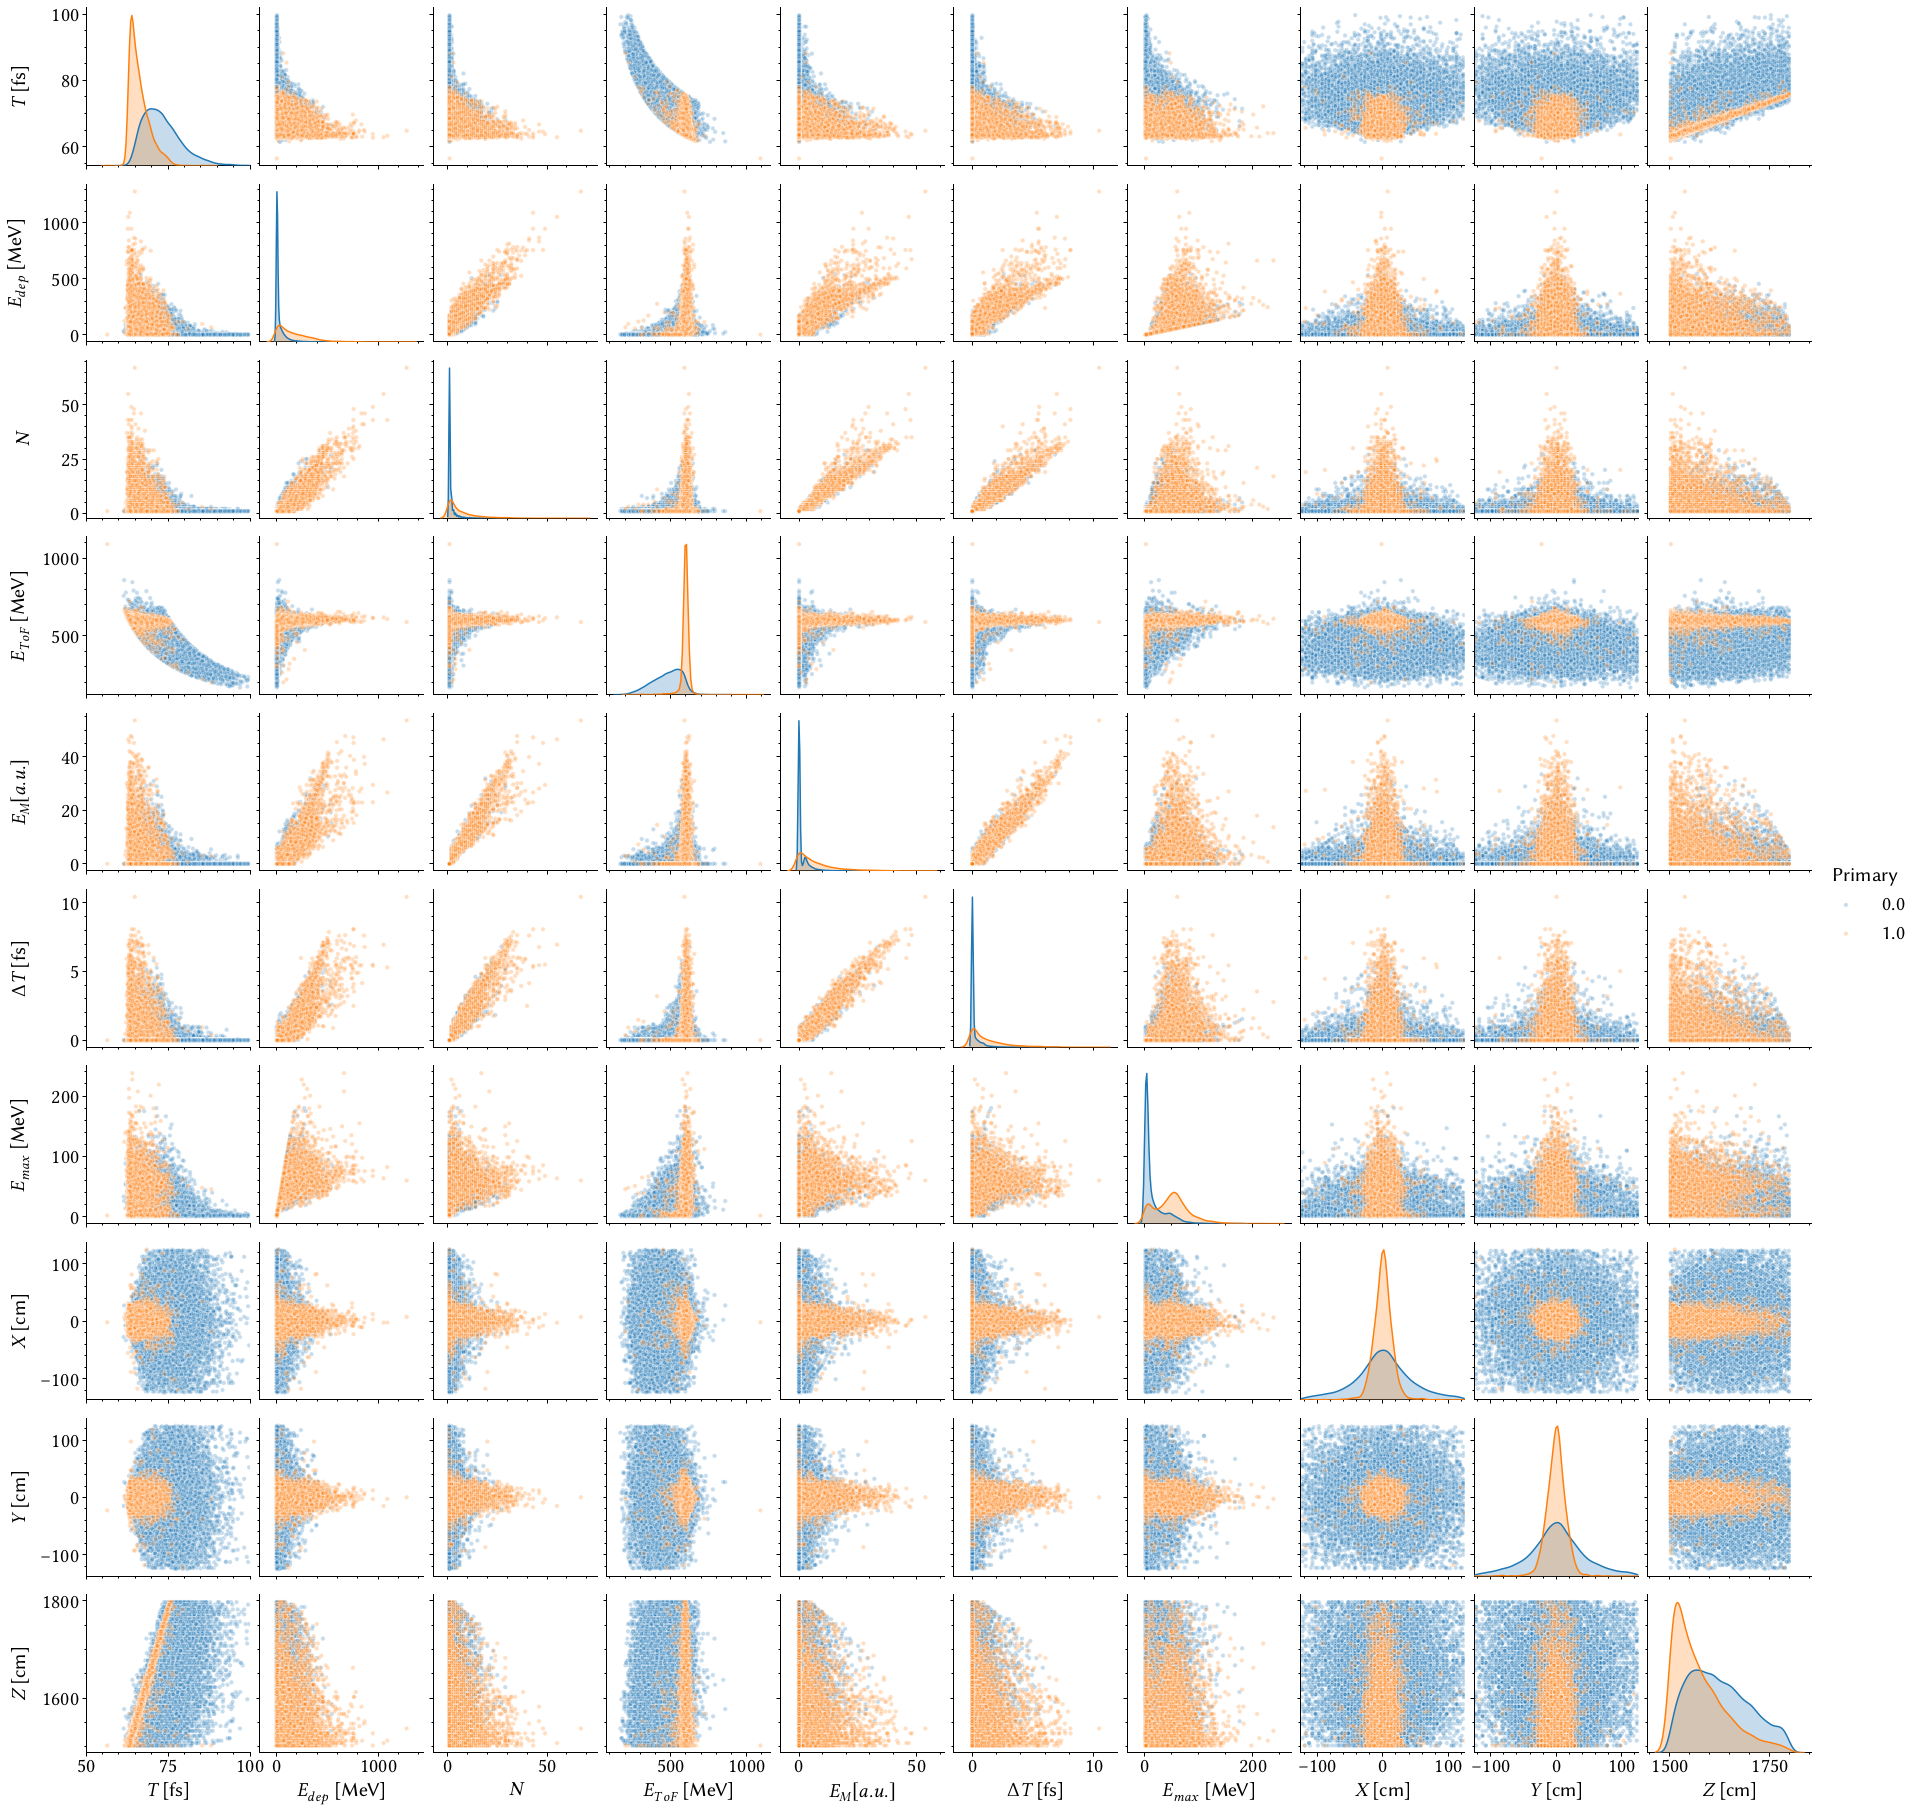

In [3]:
sample = data[(abs(data["X"]) < 125) & (abs(data["Y"]) < 125) & (data["T"] < 100)].sample(frac=0.1)

g = sns.pairplot(
    sample,
    vars=["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"],
    hue="prim",
    plot_kws={"s": 20, "alpha": 0.25},
)

for ax in g.axes[:, 0]:
    ax.get_yaxis().set_label_coords(-0.35, 0.5)

g.axes[-1][0].set_xlim(50, 100)
g.axes[-1][7].set_xlim(-125, 125)
g.axes[-1][8].set_xlim(-125, 125)

labels = [
    "$T$ [fs]",
    "$E_{dep}$ [MeV]",
    "$N$",
    "$E_{ToF}$ [MeV]",
    "$E_{M} [a.u.]",
    "$\Delta T$ [fs]",
    "$E_{max}$ [MeV]",
    "$X$ [cm]",
    "$Y$ [cm]",
    "$Z$ [cm]",
]

for i, l in enumerate(labels):
    g.axes[-1][i].set_xlabel(l)
    g.axes[i][0].set_ylabel(l)

g._legend.set_title("Primary")

fig = g.fig
fig.savefig(f"results/pairplot_clusterfeature.pdf", bbox_inches="tight")
fig.savefig(f"results/pairplot_clusterfeature.png", bbox_inches="tight")

display(fig)